In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]>

In [5]:
x=df.drop('Weight',axis=1)
y=df['Weight']

In [6]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [7]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
x.Gender= le.fit_transform(x.Gender)
x.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

# Split Dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest,ytrain, ytest = train_test_split(x, y,test_size=.30, random_state=1)

In [13]:
xtrain

,Gender,Height
1277,1,72.385301
5361,0,60.960147
5728,0,69.119292
4276,1,68.271050
3112,1,64.991405
...,...,...
2895,1,71.382577
7813,0,66.148829
905,1,66.539812
5192,0,66.563772


In [14]:
xtest

,Gender,Height
7154,0,65.068038
3258,1,70.824643
2188,1,68.663594
5609,0,65.987610
3186,1,70.901461
...,...,...
8004,0,58.963526
7644,0,66.613529
8521,0,67.895659
957,1,69.031063


In [15]:
ytrain

1277    189.165592
5361    124.876796
5728    168.864403
4276    172.941248
3112    144.551044
           ...    
2895    205.545795
7813    152.749747
905     175.093255
5192    156.832191
235     198.460249
Name: Weight, Length: 5988, dtype: float64

In [16]:
ytest

7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
           ...    
8004    110.815421
7644    148.605255
8521    153.436481
957     170.310122
233     195.392618
Name: Weight, Length: 2567, dtype: float64

# Apply Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr= LinearRegression()

In [19]:
lr.fit(xtrain, ytrain)

LinearRegression()

# Evaluate the model

In [20]:
lr.coef_

array([19.34359322,  5.96887438])

In [21]:
lr.intercept_

-244.55280903255786

In [22]:
lr.predict(xtest)

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [23]:
lr.score(x,y)

0.899942429187834

In [24]:
lr.score(xtrain, ytrain)

0.8972135459668118

In [25]:
lr.score(xtest,ytest)

0.905995960709116

In [26]:
from sklearn.metrics import mean_squared_error 
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred)
mse

99.67250998070034

In [27]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(ytest, pred)
mae

7.98213259272913

# Apply KNN Regressior

In [28]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor

In [29]:
neigh = KNeighborsRegressor()

In [30]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [31]:
neigh.predict(xtest)

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

In [32]:
neigh.score(xtrain, ytrain)

0.9170756955071054

In [33]:
neigh.score(x,y)

0.9067857242892374

In [34]:
neigh.score(xtest, ytest)

0.8838502073708883

In [35]:
from sklearn.metrics import mean_squared_error 
pred = neigh.predict(xtest)
mse = mean_squared_error(ytest , pred)
mse

123.15365863436983

In [36]:
from sklearn.metrics import mean_absolute_error #MAE
mae = mean_absolute_error(ytest, pred)
mae

8.850747809837165

# Tuning

In [37]:
n_neighbors= np.random.randint(5,25,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p= [1,2]

In [38]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [39]:
print(ids)

{'n_neighbors': array([10, 24, 12, 19,  7]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([13, 22, 10, 22, 47]), 'p': [1, 2]}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rcv= RandomizedSearchCV(neigh, ids, n_iter = 200, cv=3)

In [42]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([13, 22, 10, 22, 47]),
                                        'n_neighbors': array([10, 24, 12, 19,  7]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [43]:
rcv.cv_results_

{'mean_fit_time': array([0.        , 0.        , 0.00151714, 0.01039163, 0.        ,
        0.00709128, 0.        , 0.00520905, 0.00317192, 0.00520865,
        0.01041651, 0.00520738, 0.00350316, 0.        , 0.00520706,
        0.        , 0.01562142, 0.        , 0.        , 0.01041587,
        0.00921607, 0.00533986, 0.0104142 , 0.00069793, 0.00521104,
        0.00067004, 0.00940331, 0.00434597, 0.01056035, 0.        ,
        0.        , 0.00417248, 0.00520968, 0.01043439, 0.00520762,
        0.00266616, 0.00531673, 0.01333261, 0.00400686, 0.02357539,
        0.01130295, 0.01200604, 0.00937168, 0.01199667, 0.01332021,
        0.01065318, 0.00930738, 0.00798758, 0.00933417, 0.00398803,
        0.00933115, 0.01200358, 0.0040005 , 0.00399899, 0.00533358,
        0.00400178, 0.00401179, 0.00799735, 0.00666666, 0.00533748,
        0.00531697, 0.00533382, 0.00665784, 0.0039746 , 0.0039835 ,
        0.0026768 , 0.00667572, 0.00664616, 0.00799012, 0.00532126,
        0.00533255, 0.00465941,

In [44]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.208932,0.007492,uniform,2,19,22,brute,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.891459,0.889005,0.894922,0.891795,0.002428,27
1,0.000000,0.000000,0.035262,0.005397,uniform,2,24,22,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.892211,0.889386,0.895312,0.892303,0.002420,11
2,0.001517,0.002146,0.005233,0.007401,uniform,1,7,22,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.882680,0.880858,0.886114,0.883217,0.002179,82
3,0.010392,0.007348,0.005206,0.007362,distance,1,7,22,auto,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.862586,0.864034,0.870132,0.865584,0.003270,177
4,0.000000,0.000000,0.144792,0.004863,uniform,1,10,22,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.887590,0.885357,0.889883,0.887610,0.001848,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.006681,0.001870,0.021330,0.001883,uniform,2,19,13,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.891459,0.889005,0.894922,0.891795,0.002428,27
196,0.007996,0.000011,0.014676,0.003763,distance,1,7,13,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.862586,0.864034,0.870132,0.865584,0.003270,177
197,0.005346,0.001879,0.038665,0.001880,distance,1,12,10,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.868405,0.869346,0.875107,0.870953,0.002963,135
198,0.006695,0.001884,0.013324,0.001901,distance,2,10,13,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.866663,0.867818,0.873583,0.869355,0.003027,167


In [45]:
rcv.best_score_

0.8923302602808524

In [46]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 24,
 'leaf_size': 22,
 'algorithm': 'kd_tree'}

In [47]:
knn= rcv.best_estimator_
knn

KNeighborsRegressor(algorithm='kd_tree', leaf_size=22, n_neighbors=24, p=1)

In [48]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=22, n_neighbors=24, p=1)

In [49]:
knn.score(xtrain,ytrain)

0.9007621397350515

In [50]:
knn.score(xtest, ytest)

0.901034823499145

In [51]:
knn.score(x,y)

0.9008537688243546

In [52]:
0.9012243535512663-0.9067857242892374 #difference between tuned knn & knn

-0.005561370737971139

In [53]:
0.9012243535512663-0.899942429187834 #difference between tuned knn & linear regression

0.0012819243634323296

In [54]:
pred2 = knn.predict(xtest)
mse = mean_squared_error(ytest , pred2)
mse

104.93280519574247

In [55]:
mae = mean_absolute_error(ytest , pred2)
mae

8.167549488353298

# KNN classifier

In [56]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [57]:
df1=df.copy()

In [58]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [59]:
df1.Gender=le.fit_transform(df1.Gender)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [60]:
x1= df1.drop('Gender', axis=1)
y1=df1['Gender']

In [61]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [62]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [63]:
x1train, x1test,y1train, y1test = train_test_split(x1, y1,test_size=.30, random_state=1)

In [64]:
x1train.head()

,Height,Weight
1277,72.385301,189.165592
5361,60.960147,124.876796
5728,69.119292,168.864403
4276,68.271050,172.941248
3112,64.991405,144.551044


In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knc = KNeighborsClassifier()

In [68]:
knc.fit(x1train,y1train)

KNeighborsClassifier()

In [75]:
y1predict=knc.predict(x1test)
y1predict

array([1, 1, 1, ..., 0, 1, 1])

In [76]:
knc.score(x1,y1)

0.9228521332554062

In [77]:
knc.score(x1train,y1train)

0.9263527054108216

In [78]:
knc.score(x1test,y1test)

0.9146864043630697

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [81]:
print(classification_report(y1test, y1predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [82]:
confusion_matrix(y1test,y1predict)

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

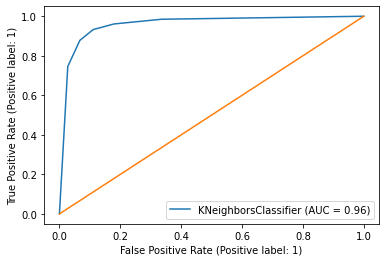

In [84]:
import matplotlib.pyplot as plt
plot_roc_curve(knc, x1test, y1test)
plt.plot([0,1],[0,1])